In [1]:
from autumn.tools.project import get_project, ParameterSet
from matplotlib import pyplot as plt
import pandas as pd
from autumn.projects.tuberculosis.kiribati.project import project
from autumn.projects.tuberculosis.kiribati.utils import SA_PARAM_VALUES
from autumn.tools.utils.pretty import pretty_print
from autumn.settings import PROJECTS_PATH
import warnings
from pathlib import PurePath
import json


In [2]:
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [3]:
p = get_project("tuberculosis", "kiribati")

In [4]:
base_params = project.param_set.baseline
sc_models = project.param_set.scenarios

In [5]:
model_0 = p.run_baseline_model(base_params)

In [6]:
outdf = model_0.get_derived_outputs_df()

In [7]:
sc_models = p.run_scenario_models(model_0, project.param_set.scenarios)
scenario_dfs = [m.get_derived_outputs_df() for m in sc_models]

In [12]:
outputs_to_plot = ["notifications", "population_size", "prevalence_infectious", "cumulative_diseased"]

In [8]:
def load_ts(path):
    with open(path, "r") as f:
        data = json.load(f)
    return data
    

In [9]:
path =  PurePath(PROJECTS_PATH, "tuberculosis", "kiribati", "timeseries.json")

In [10]:
ts = load_ts(path)

In [13]:
to_be_fitted = [outname for outname in outputs_to_plot if len(ts[outname]['times'])]

In [14]:
for i in to_be_fitted:
    if to_be_fitted.index(i) == 0:
        basedata = pd.DataFrame(list(zip(ts[i]['times'], ts[i]['values'])), columns = ['Years', str(i)])
    else:
        basedata = basedata.merge(pd.DataFrame(list(zip(ts[i]['times'], ts[i]['values'])), columns = ['Years', str(i)]), on='Years', how='outer')


In [17]:
basedata.index = basedata['Years']

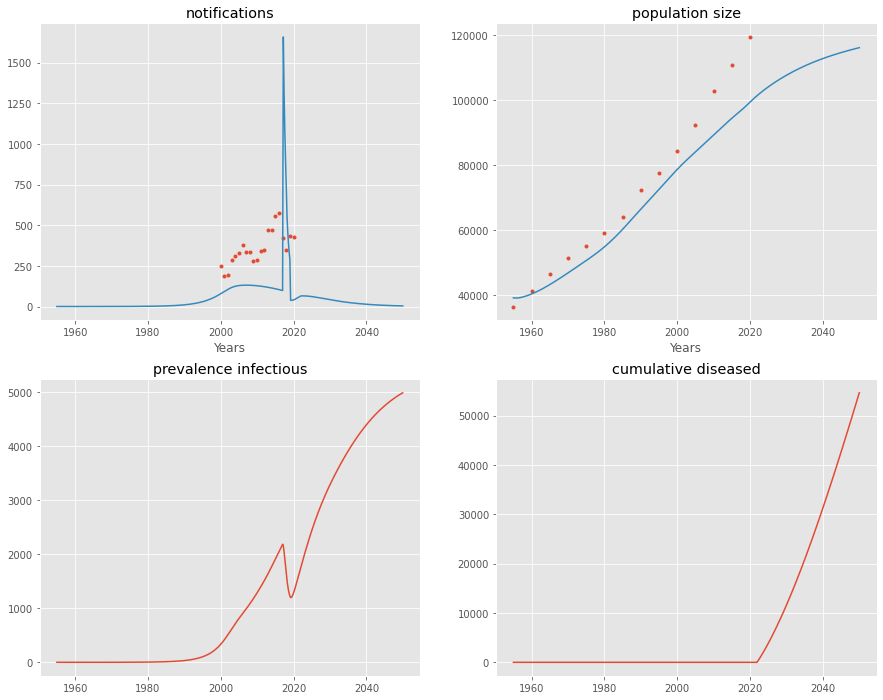

In [18]:
fig = plt.figure(figsize=(15, 12))
for i_out, output in enumerate(outputs_to_plot):
    axis = fig.add_subplot(2, 2, i_out + 1)
    if output in to_be_fitted:
        basedata[output].plot(style='.')
    outdf[output].plot(label="baseline")
    axis.set_title(output.replace("_", " "))